# About this notebook

This notebook is based on Coursera's course "Machine learning" by Prof. Andrew Ng from Stanford University. In this course, all codes are written in Octave or Matlab. This notebook provides the Python version of the codes.

This notebook is based on the Exerxise 6. Key words are as follows:
- Support vector machine
- Decision boundary
- Linear classification
- C parameter
- Gaussian kernels
- Spam classification

# Support vector machine

- About [support vector machine (SVM)](https://scikit-learn.org/stable/modules/svm.html#support-vector-machines) in scikit learn.

## Data preparation

At first, data will be taken from mat files. There are 3 datasets named "<strong>ex6data1.mat</strong>," "<strong>ex6data2.mat</strong>," and "<strong>ex6data3.mat</strong>." In the third dataset (<strong>ex6data3.mat</strong>), cross validation set is also available in addition to the test set. It should be noted that extra feature (x<sub>0</sub> = 1) will not added in the next cell. 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm #SVM software

path=os.getcwd()
datpath1=path + '/ex6data1.mat'
datpath2=path + '/ex6data2.mat'
datpath3=path + '/ex6data3.mat'

#Getting data
dat1 = loadmat(datpath1) 
dat2 = loadmat(datpath2) 
dat3 = loadmat(datpath3) 

#Showing keys
print(dat1.keys())
print(dat2.keys())
print(dat3.keys())

#Defining data
X1=dat1['X']
y1=dat1['y']
X2=dat2['X']
y2=dat2['y']
X3=dat3['X']
y3=dat3['y']
X3val=dat3['Xval']
y3val=dat3['yval']

# Shapes of data
print("\nData size (X1): {}".format(X1.shape))
print("Data size (y1): {}".format(y1.shape))
print("Data size (X2): {}".format(X2.shape))
print("Data size (y2): {}".format(y2.shape))
print("Data size (X3): {}".format(X3.shape))
print("Data size (y3): {}".format(y3.shape))
print("Data size (X3val): {}".format(X3val.shape))
print("Data size (y3val): {}".format(y3val.shape))

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

Data size (X1): (51, 2)
Data size (y1): (51, 1)
Data size (X2): (863, 2)
Data size (y2): (863, 1)
Data size (X3): (211, 2)
Data size (y3): (211, 1)
Data size (X3val): (200, 2)
Data size (y3val): (200, 1)


## Definitions of functions

In the next cell, the function <strong>CreateNegPosData</strong> will be defined to seperate input data into positive and negative datasets. The classification is based on the value of y: 0 or 1.  

In [2]:
def CreateNegPosData(Xf,yf):
# Xf: mf x 2 matrix. yf: mf-dimensional vector including 0 or 1. 
#Negative (y=0) and positive (y=1) data will be created.

    i_neg=0
    i_pos=0

    mf=yf.shape[0]
    pos=yf.nonzero()[0][:] #Find non-zero values for y

    X_neg=np.zeros((mf-pos.shape[0],2)) # data with y = 0
    X_pos=np.zeros((pos.shape[0],2)) # data with y = 1

    for j in range(mf):
        if yf[j]==0: #neg (not admitted)
            X_neg[i_neg,0]=Xf[j,0]
            X_neg[i_neg,1]=Xf[j,1]
            i_neg=i_neg+1
        elif yf[j]==1:
            X_pos[i_pos,0]=Xf[j,0]
            X_pos[i_pos,1]=Xf[j,1]
            i_pos=i_pos+1       
    
    return X_neg, X_pos

The function <strong>plotBoudary</strong> will be defined to visualize your 2D-data and show the result of the support vector machine.  

In [3]:
def plotBoundary(svm_f, Xf_neg, Xf_pos, Xmin_f, Xmax_f, ymin_f, ymax_f):
#svm_f: the result of SVM 
#Xf_neg, post contain m x 2 matrices.
#Xmin_f, Xmax_f, ymin_f, ymax_f: Ranges.

    xf_boudary = np.linspace(Xmin_f,Xmax_f,100)
    yf_boudary = np.linspace(ymin_f,ymax_f,100)
    zf_boudary = np.zeros((len(xf_boudary),len(yf_boudary)))
    for i in range(len(xf_boudary)):
        for j in range(len(yf_boudary)):
            zf_boudary[i][j] = float(svm_f.predict(np.array([xf_boudary[i],yf_boudary[j]]).reshape(1,-1)))
    zf_boudary = zf_boudary.transpose()

    plt.contour( xf_boudary, yf_boudary, zf_boudary,[0.5])
    
    plt.scatter(Xf_neg[:,0],Xf_neg[:,1],marker='o',color='red',label='Neg') #negative
    plt.scatter(Xf_pos[:,0],Xf_pos[:,1],marker='+',color ='black',label='Pos') #positive

## Decision boundary

### Linear classification

In the next cell, SVM will be used to do linear classification. Different values of the parameter C (1 and 100) will be tested. When the parameter C is large, the SVM classifies every single example correctly. However, a decision boundary does not appear to be a natural fit for the data. The parameter C plays a role similar to 1/&lambda;, where &lambda; is the regularization parameter used for logistic regression.

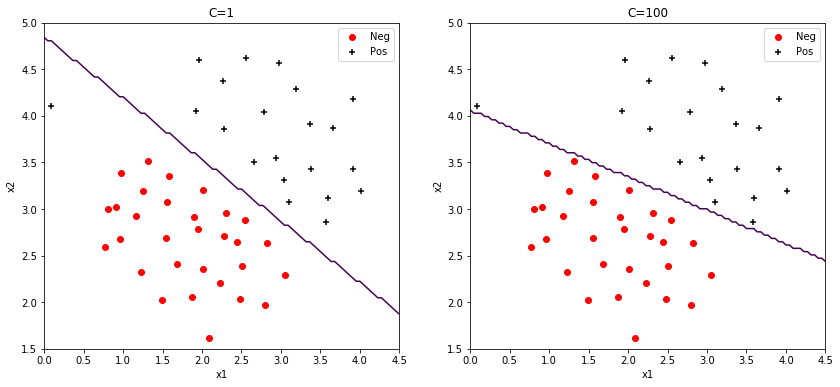

In [4]:
#preparation of the positive and negative data
X1_neg, X1_pos = CreateNegPosData(X1,y1)

plt.figure(figsize=(14,6))

#C=1
plt.subplot(121)

linear_svmC1 = svm.SVC(C=1, kernel='linear')
linear_svmC1.fit( X1, y1.flatten() )

plotBoundary(linear_svmC1,X1_neg,X1_pos,0,4.5,1.5,5)
plt.title("C=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

#C=100
plt.subplot(122)

linear_svmC100 = svm.SVC(C=100, kernel='linear')
linear_svmC100.fit( X1, y1.flatten() )

plt.title("C=100")
plotBoundary(linear_svmC100,X1_neg,X1_pos,0,4.5,1.5,5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.show()

### SVM with Gaussian kernels

In this part, you will be using SVM to do non-linear classification. In particular, you will adopt SVMs with Gaussian kernels. Other types of kernels are described [here](https://scikit-learn.org/stable/modules/svm.html#kernel-functions).

The [radial basis function (RBF) kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) is defined by

$$
K(x,x')=exp\left(-\frac{||x-x'||^{2}}{2\sigma^{2}}\right)=exp\left(-\gamma||x-x'||^{2}\right)
$$

Here, ||x-x'||<sup>2</sup> is the squared Euclidean distance between the two feature vectors, x and x'. &sigma; is a free parameter that determines the width of the Gaussian function. 

You can think of this Gaussian kernel as a similarity function that measures the distance between a pair of examples. 

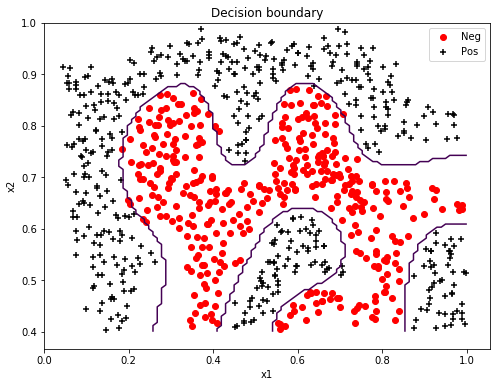

In [7]:
X2_neg, X2_pos = CreateNegPosData(X2,y2)

sigma = 0.1
gauss_gamma = 0.5/sigma/sigma
gauss_svm = svm.SVC(C=1, kernel='rbf', gamma=gauss_gamma)
gauss_svm.fit( X2, y2.flatten() )

plt.figure(figsize=(8,6))
plotBoundary(gauss_svm,X2_neg,X2_pos,0,1.0,0.4,1.0)
plt.title("Decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In the next cell, various values for the parameter C and &sigma; will be used to obtain the best parameters that give the highest score. The cross validation set will be used to do this. The best parameter might be changed if you changed <strong>num_dat</strong> in the next cell. However, decision boundarys will look similar. 

In [8]:
X3_neg, X3_pos = CreateNegPosData(X3,y3)

min_calc=0.01
max_calc=20
num_dat=150

Cj_list=np.linspace(min_calc,max_calc,num_dat)
score_model=np.zeros((num_dat,num_dat))

highest_score=0
best_param=np.zeros(2)

for i in range(num_dat): #for Cj
    for j in range(num_dat): # for sigma
        sigma = Cj_list[j]
        gauss_svm = svm.SVC(C=Cj_list[i], kernel='rbf', gamma= 1/sigma/sigma)
        gauss_svm.fit( X3, y3.flatten() )
    
        score_model[i, j] = gauss_svm.score(X3val,y3val)
        if highest_score < score_model[i,j]:
            highest_score = score_model[i,j]
            best_param = [Cj_list[i],Cj_list[j]] #C, sigma

print("Best parameters:\n    C=%0.2f, sigma=%0.2f\n    score=%0.3f"%(best_param[0],best_param[1],highest_score))

Best parameters:
    C=0.68, sigma=0.14
    score=0.965


The dependence of the score on the parameters will be shown as a 2D-map. The best parameter is indicated by a large red circle.

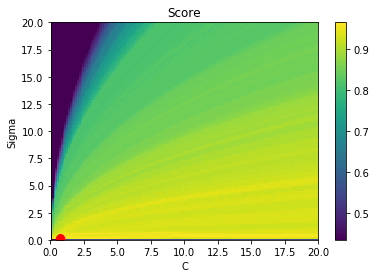

In [9]:
plt.pcolor(Cj_list,Cj_list,score_model.T,cmap='viridis')
plt.xlabel("C")
plt.ylabel("Sigma")
plt.title("Score")
plt.colorbar()
plt.plot(best_param[0],best_param[1],marker='o',color='red',markersize=8)
plt.show()

Decision boundary will be drawn using the best parameters for SVM. 

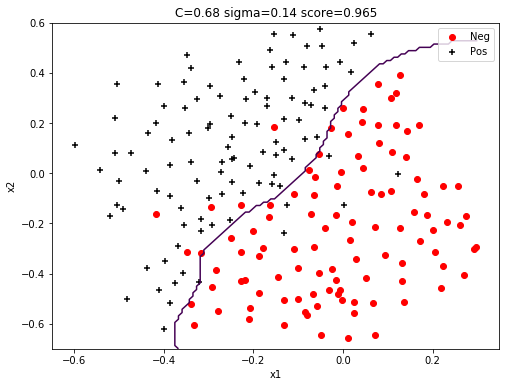

In [10]:
sigma = best_param[1]
gauss_gamma = 1/sigma/sigma
gauss_svm = svm.SVC(C=best_param[0], kernel='rbf', gamma=gauss_gamma)
gauss_svm.fit( X3, y3.flatten() )

plt.figure(figsize=(8,6))
plotBoundary(gauss_svm,X3_neg,X3_pos,-0.5,0.3,-0.7,0.6)
plt.title("C=%0.2f sigma=%0.2f score=%0.3f"%(best_param[0],best_param[1],highest_score))
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Spam classification

In this part, the support vector machine is used to buid a spam filter. 

## Data preparation and normalization

A sample e-mail will be obtained and shown.

In [11]:
import re

path=os.getcwd()
datpath=path + '/emailSample1.txt'

with open(datpath) as f:
    email=f.read()
print(email)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In the next cell, the function <strong>processEmail</strong> is defined. This function does the following email preprocessing and normalization steps:

1. Lower-casing: The entire e-mail is converted into lower case. Capitalization is ignored.
2. Stripping HTML: All HTML tags are removed from the emails.
3. Normalizing URLs: All URLs are replaced by the text "httpaddr."
4. Omitting "\n"
5. Replacing dollar signs $ by the word "dollar."
6. Replacing numbers: All numbers are replaced by the text "number."
7. Replacing email address: All e-mail addresses are replaced by the text "emailaddr."
8. Removal of non-words: All signs, symbols, and punctuation are removed.
9. Word stemming: Words are reduced to their stemmed form. For example, "discount," "discounts," "discounted," and "discounting" are all replaced with "discount."

In [12]:
def processEmail(email_f):
    #Lower-casing
    email_f=email_f.lower()

    #Replacing URLs by "httpaddr"
    urls_f = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', email_f)
    n_url=len(urls_f)
    for j in range(n_url):
        email_f=re.sub(urls_f[j], 'httpaddr', email_f)

    #Omit \n
    email_f=email_f.replace('\n', ' ')

    #Replacing dollar signs
    email_f=email_f.replace('$', 'dollar')

    #Replacing numbers by the word "number"
    email_f=re.sub('[0-9]+','number', email_f)

    #Replacing e-mail addresses by the word "emailaddr"
    email_f = re.sub('[^\s]+@[^\s]+','emailaddr ', email_f)

    #Removing unnecessary spaces and various symbols.
    email_f = email_f.replace("'"," ")
    email_f = email_f.replace("-"," ")
    email_f = re.split('[ @$/#.-:&*+=\[\]?!(){},">_<;%\n\r]', email_f)

    email_f= [word for word in email_f if len(word) > 0]

    #Word stemming
    from nltk.stem.porter import PorterStemmer
    for j in range(len(email_f)):
        email_f[j]=PorterStemmer().stem(email_f[j])
    
    return email_f

E-mail is preprocessed and shown below.

In [13]:
email=processEmail(email)
print(email)

['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', 're', 'expect', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr']


A vocabulary list is taken from the text file "<strong>vocab.txt</strong>." This vocabulary list was made by choosing all words which occur at least 100 times in the spam corpus. In practice, the number of words contained in a vocabulary list is about 10000 to 50000.

In [14]:
path=os.getcwd()
datpath=path + '/vocab.txt'

with open(datpath) as f:
    vocab_list=f.readlines()

n_vocab=len(vocab_list)

for j in range(n_vocab):
    # Removing \n
    vocab_list[j]=vocab_list[j].rstrip("\n")

    # Removing numbers
    vocab_list[j]=re.sub('[0-9]+','',vocab_list[j])
    
    # Removing \t
    vocab_list[j]=vocab_list[j].lstrip("\t")
    
print("The number of words in our vocabulary list is %d"%len(vocab_list))

The number of words in our vocabulary list is 1899


The sample e-mail will be compared with the vocabulary list.  By doing so, a list of word indices that contains the index of the word in the vocabulary list will be created. If a word does not exist in the vocabulary list, it is skipped. 

In [15]:
print("Index | processed word")
for j in range(len(email)):
    if  (email[j] in vocab_list) == True:
        v=vocab_list.index(email[j])
        print("%d | %s"%(v+1,email[j]))

Index | processed word
86 | anyon
916 | know
794 | how
1077 | much
883 | it
370 | cost
1699 | to
790 | host
1822 | web
1831 | well
883 | it
431 | depend
1171 | on
794 | how
1002 | mani
1893 | you
1364 | re
592 | expect
1676 | thi
238 | can
162 | be
89 | anywher
688 | from
945 | less
1663 | than
1120 | number
1062 | month
1699 | to
375 | coupl
1162 | of
479 | dollarnumb
1893 | you
1510 | should
799 | httpaddr
1182 | or
1237 | perhap
810 | if
1895 | your
1440 | run
1547 | someth
181 | big
1699 | to
1758 | unsubscrib
1896 | yourself
688 | from
1676 | thi
992 | mail
961 | list
1477 | send
71 | an
530 | email
1699 | to
531 | emailaddr


In the previous cell, indices for the words in the e-imail were shown. In the next cell, a funciton for creating a feature vector will be defined. With this function each email can be converted into a vector whose number of the components is the same as that of words in the vocabulary list. The components of this vector have the value of 0 or 1. If the j-th word is included in the email, x<sub>j</sub>=1. If not, x<sub>j</sub>=0.  

In [16]:
def emailFeatures(email_f,vocab_list_f):
    word_indices= [vocab_list_f.index(email_f[j])+1 for j in range(len(email_f)) if (email_f[j] in vocab_list_f) == True]

    n_vocab_f=len(vocab_list_f)
    xfeature_f = np.zeros(n_vocab)

    n_word_indices=len(word_indices)

    for j in range(n_word_indices):    
        xfeature_f[word_indices[j]-1]=1.
    #For example, xfeature[10] =1 means word_indices[j]=11

    return xfeature_f

In [17]:
xfeature=emailFeatures(email,vocab_list)
print("The feature vector has the length of %d and %d non-zero components."%(xfeature.shape[0],np.count_nonzero(xfeature)))

The feature vector has the length of 1899 and 45 non-zero components.


## Training SVM for spam classification

In order to train a SVM classifier, training and test sets will be prepared. X is m x n matrix, where m is the number of training/test dataset (4000/1000) and n is the number of features (1899).

In [18]:
path=os.getcwd()
datpath_train=path + '/spamTrain.mat'
datpath_test=path + '/spamTest.mat'

#Getting data
dat_spam_train = loadmat(datpath_train) 
dat_spam_test = loadmat(datpath_test) 

#Showing keys
print("Training set:",dat_spam_train.keys())
print("Test set:",dat_spam_test.keys())

Xspam_train, yspam_train = dat_spam_train['X'], dat_spam_train['y']
Xspam_test, yspam_test = dat_spam_test['Xtest'], dat_spam_test['ytest']

print("Data size of Xspam_train:",Xspam_train.shape)
print("Data size of yspam_train:",yspam_train.shape)
print("Data size of Xspam_test:",Xspam_test.shape)
print("Data size of yspam_test:",yspam_test.shape)

Training set: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
Test set: dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])
Data size of Xspam_train: (4000, 1899)
Data size of yspam_train: (4000, 1)
Data size of Xspam_test: (1000, 1899)
Data size of yspam_test: (1000, 1)


Our SVM classifier will be trained. The training and test accuracies will be shown.

In [19]:
linear_svm = svm.SVC(C=0.1, kernel='linear')
linear_svm.fit( Xspam_train, yspam_train.flatten() )

score_train = linear_svm.score(Xspam_train,yspam_train)
score_test = linear_svm.score(Xspam_test,yspam_test)

print("Training accuracy: %0.3f (expected value is 0.998 for C=0.1)"%score_train)
print("Test accuracy: %0.3f (expected value is 0.989 for C=0.1)"%score_test)

Training accuracy: 0.998 (expected value is 0.998 for C=0.1)
Test accuracy: 0.989 (expected value is 0.989 for C=0.1)


Finally, using the trained SVM, our sample e-mail will be checked whether it is a spam or not.

In [20]:
if linear_svm.predict(xfeature.reshape(-1,1).T)[0] == 0:
    print("Your sample E-mail is not a spam.")
elif linear_svm.predict(xfeature.reshape(-1,1).T)[0] ==1:
    print("Your sample E-mail is a spam.")

Your sample E-mail is not a spam.


## More tests on other E-mail samples

### emailSample2.txt

In [21]:
path=os.getcwd()
datpath=path + '/emailSample2.txt'

#Get a sample e-mail
with open(datpath) as f:
    email2=f.read()
print(email2)

Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've searched the 'ne

In [22]:
email2=processEmail(email2)
print(email2)

['folk', 'my', 'first', 'time', 'post', 'have', 'a', 'bit', 'of', 'unix', 'experi', 'but', 'am', 'new', 'to', 'linux', 'just', 'got', 'a', 'new', 'pc', 'at', 'home', 'dell', 'box', 'with', 'window', 'xp', 'ad', 'a', 'second', 'hard', 'disk', 'for', 'linux', 'partit', 'the', 'disk', 'and', 'have', 'instal', 'suse', 'number', 'number', 'from', 'cd', 'which', 'went', 'fine', 'except', 'it', 'didn', 't', 'pick', 'up', 'my', 'monitor', 'i', 'have', 'a', 'dell', 'brand', 'enumberfpp', 'number', 'lcd', 'flat', 'panel', 'monitor', 'and', 'a', 'nvidia', 'geforcenumb', 'tinumb', 'video', 'card', 'both', 'of', 'which', 'are', 'probabl', 'too', 'new', 'to', 'featur', 'in', 'suse', 's', 'default', 'set', 'i', 'download', 'a', 'driver', 'from', 'the', 'nvidia', 'websit', 'and', 'instal', 'it', 'use', 'rpm', 'then', 'i', 'ran', 'saxnumb', 'as', 'wa', 'recommend', 'in', 'some', 'post', 'i', 'found', 'on', 'the', 'net', 'but', 'it', 'still', 'doesn', 't', 'featur', 'my', 'video', 'card', 'in', 'the', '

In [23]:
xfeature2=emailFeatures(email2,vocab_list)

if linear_svm.predict(xfeature2.reshape(-1,1).T)[0] == 0:
    print("Your sample E-mail is not a spam.")
elif linear_svm.predict(xfeature2.reshape(-1,1).T)[0] ==1:
    print("Your sample E-mail is a spam.")

Your sample E-mail is not a spam.


### spamSample1.txt

In [24]:
path=os.getcwd()
datpath=path + '/spamSample1.txt'

#Get a sample e-mail
with open(datpath) as f:
    email3=f.read()
print(email3)

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72




In [25]:
email3=processEmail(email3)
print(email3)

['do', 'you', 'want', 'to', 'make', 'dollarnumb', 'or', 'more', 'per', 'week', 'if', 'you', 'are', 'a', 'motiv', 'and', 'qualifi', 'individu', 'i', 'will', 'person', 'demonstr', 'to', 'you', 'a', 'system', 'that', 'will', 'make', 'you', 'dollarnumb', 'number', 'per', 'week', 'or', 'more', 'thi', 'is', 'not', 'mlm', 'call', 'our', 'number', 'hour', 'pre', 'record', 'number', 'to', 'get', 'the', 'detail', 'number', 'number', 'number', 'i', 'need', 'peopl', 'who', 'want', 'to', 'make', 'seriou', 'money', 'make', 'the', 'call', 'and', 'get', 'the', 'fact', 'invest', 'number', 'minut', 'in', 'yourself', 'now', 'number', 'number', 'number', 'look', 'forward', 'to', 'your', 'call', 'and', 'i', 'will', 'introduc', 'you', 'to', 'peopl', 'like', 'yourself', 'who', 'are', 'current', 'make', 'dollarnumb', 'number', 'plu', 'per', 'week', 'number', 'number', 'number', 'numberljgvnumb', 'numberleannumberlrmsnumb', 'numberwxhonumberqiytnumb', 'numberrjuvnumberhqcfnumb', 'numbereidbnumberdmtvlnumb']


In [26]:
xfeature3=emailFeatures(email3,vocab_list)

if linear_svm.predict(xfeature3.reshape(-1,1).T)[0] == 0:
    print("Your sample E-mail is not a spam.")
elif linear_svm.predict(xfeature3.reshape(-1,1).T)[0] ==1:
    print("Your sample E-mail is a spam.")

Your sample E-mail is a spam.


### spamSample2.txt

In [27]:
path=os.getcwd()
datpath=path + '/spamSample2.txt'

#Get a sample e-mail
with open(datpath) as f:
    email4=f.read()
print(email4)

Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru





In [28]:
email4=processEmail(email4)
print(email4)

['best', 'buy', 'viagra', 'gener', 'onlin', 'viagra', 'numbermg', 'x', 'number', 'pill', 'dollarnumb', 'free', 'pill', 'reorder', 'discount', 'top', 'sell', 'number', 'qualiti', 'satisfact', 'guarante', 'we', 'accept', 'visa', 'master', 'e', 'check', 'payment', 'number', 'satisfi', 'custom', 'httpaddr']


In [29]:
xfeature4=emailFeatures(email4,vocab_list)

if linear_svm.predict(xfeature4.reshape(-1,1).T)[0] == 0:
    print("Your sample E-mail is not a spam.")
elif linear_svm.predict(xfeature4.reshape(-1,1).T)[0] ==1:
    print("Your sample E-mail is a spam.")

Your sample E-mail is a spam.
